# PROJECT

Cluster the credit card users into different groups to find any meaningful patterns. Use
Principal Component Analysis (PCA) to reduce the dimension of the feature space and then
use the K-means algorithm to find clusters. Import relevant Python libraries.

- Import Libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Metrics

from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error, r2_score

- Load dataset

In [126]:
credit = pd.read_csv('/content/CC GENERAL.csv')
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory Data Analysis

In [127]:
credit_shape = credit.shape
print(f"The shape of the dataset is : {credit_shape}")

The shape of the dataset is : (8950, 18)


- Check for null values and handle those values

In [128]:
credit.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [129]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [130]:
# Filter the min_payment by Nan values to see if the payments have ever been made

credit[credit['MINIMUM_PAYMENTS'].isnull()].sort_values(by='PAYMENTS', ascending=False)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1155,C11198,34.207779,0.090909,2483.26,2483.26,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,10000.0,29272.486070,NaN,0.0,12
3852,C13960,0.000000,0.000000,1200.00,1200.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,2500.0,14229.882480,NaN,0.0,12
6522,C16701,19.516936,0.090909,851.00,851.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,5000.0,9821.138115,NaN,0.0,12
5107,C15252,0.000000,0.000000,0.00,0.00,0.00,465.571691,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,6112.512276,NaN,0.0,12
2912,C12996,0.000000,0.000000,199.73,22.00,177.73,0.000000,0.454545,0.090909,0.454545,0.000000,0,6,9000.0,5557.460834,NaN,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,C12293,5.120644,0.200000,55.55,0.00,55.55,0.000000,0.100000,0.000000,0.100000,0.000000,0,1,6000.0,0.000000,NaN,0.0,10
2307,C12378,0.000000,0.000000,176.03,176.03,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2409,C12482,0.000000,0.000000,313.89,0.00,313.89,0.000000,0.916667,0.000000,0.916667,0.000000,0,19,6000.0,0.000000,NaN,0.0,12
2510,C12584,147.418569,0.181818,1074.00,1074.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,2,5500.0,0.000000,NaN,0.0,12


In [131]:
missing_credit_limit_index = credit[credit['CREDIT_LIMIT'].isnull()].index
df_cleaned = credit.drop(missing_credit_limit_index)

In [132]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHASES_T

- Exploring the strategies for data imputation


In [133]:
# Training a regression model to identify the cause of missing values

not_null_col = df_cleaned.dropna(subset=['MINIMUM_PAYMENTS']).copy()

min_pay_null = df_cleaned[df_cleaned['MINIMUM_PAYMENTS'].isnull()].copy()

features = [col for col in df_cleaned.columns if col != 'MINIMUM_PAYMENTS' and df_cleaned[col].dtype != 'object']
features

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [134]:
X_train = not_null_col[features]
y_train = not_null_col['MINIMUM_PAYMENTS']
X_predict = min_pay_null[features]

In [135]:
print(X_train.isnull().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [136]:
# Train a linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [137]:
# Predict the target

y_predict = model.predict(X_predict)

# Impute the Minimum Payments column with the y_predict values

df_cleaned.loc[df_cleaned['MINIMUM_PAYMENTS'].isnull(), 'MINIMUM_PAYMENTS'] = y_predict

In [138]:
df_cleaned.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [139]:
print(f"Shape of the dataset is : {df_cleaned.shape}")

Shape of the dataset is : (8949, 18)


In [140]:
credit_cleaned = df_cleaned.drop('CUST_ID', axis=1)
credit_cleaned.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,522.751601,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#Perform feature scaling using StandardScaler

In [141]:
# Use Standardscaler to make the mean of 0 and standard deviation of 1

scaler = StandardScaler()
credit_scaled = scaler.fit_transform(credit_cleaned)
credit_scaled

array([[-0.73205404, -0.24988139, -0.4249337 , ..., -0.30230622,
        -0.52558844,  0.36054128],
       [ 0.78685815,  0.1340494 , -0.4695839 , ...,  0.09705064,
         0.2341587 ,  0.36054128],
       [ 0.44704093,  0.51798018, -0.10771601, ..., -0.09348339,
        -0.52558844,  0.36054128],
       ...,
       [-0.74046257, -0.18589504, -0.40200016, ..., -0.3267478 ,
         0.32912795, -4.12691899],
       [-0.74523857, -0.18589504, -0.4695839 , ..., -0.33816246,
         0.32912795, -4.12691899],
       [-0.57264377, -0.88976603,  0.0420915 , ..., -0.32423452,
        -0.52558844, -4.12691899]])

#Perform PCA with all the columns and plot number of components vs. PCA cumulative explained variance. From the plot, identify the number of components required to cover 85% of the variance.


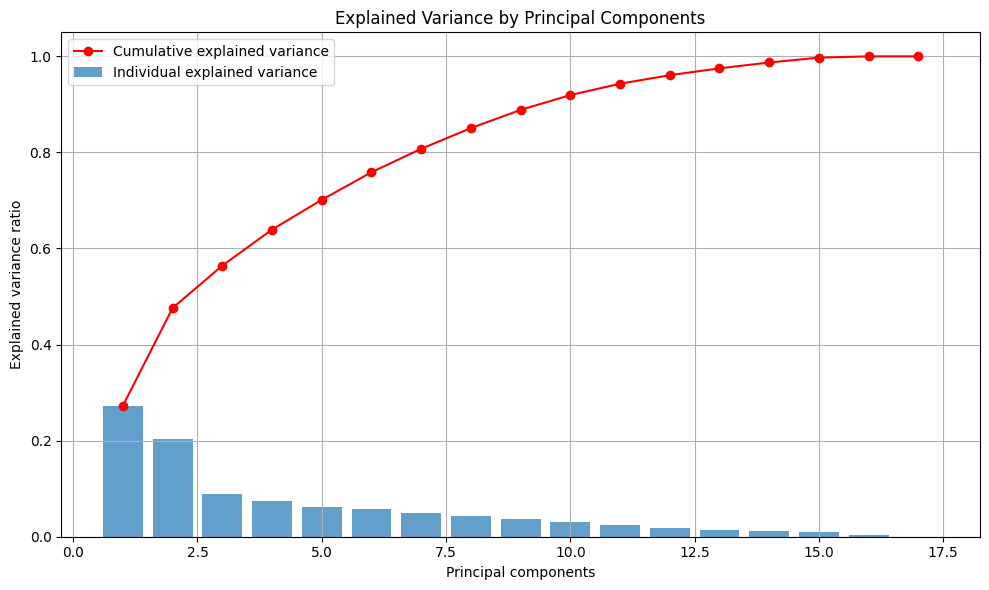

In [142]:
# Apply PCA without reducing dimensionality to find the optimal number of components

pca = PCA()
pca.fit(credit_scaled)

# Explained variance ratios

explained_variance_ratio = pca.explained_variance_ratio_
#print("Explained variance ratios:", explained_variance_ratio)

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
#print("Cumulative Explained Variance:", cumulative_explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio,
        alpha=0.7, align='center', label='Individual explained variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance,
         marker='o', linestyle='-', color='red', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [143]:
# Determine the Number of Components

n_components_85 = np.argmax(cumulative_explained_variance >= 0.85) + 1
print(f"Number of components to retain to cover 85% of variance: {n_components_85}")

Number of components to retain to cover 85% of variance: 8


#Perform PCA with 2 principal components with the aim of visualizing clustering

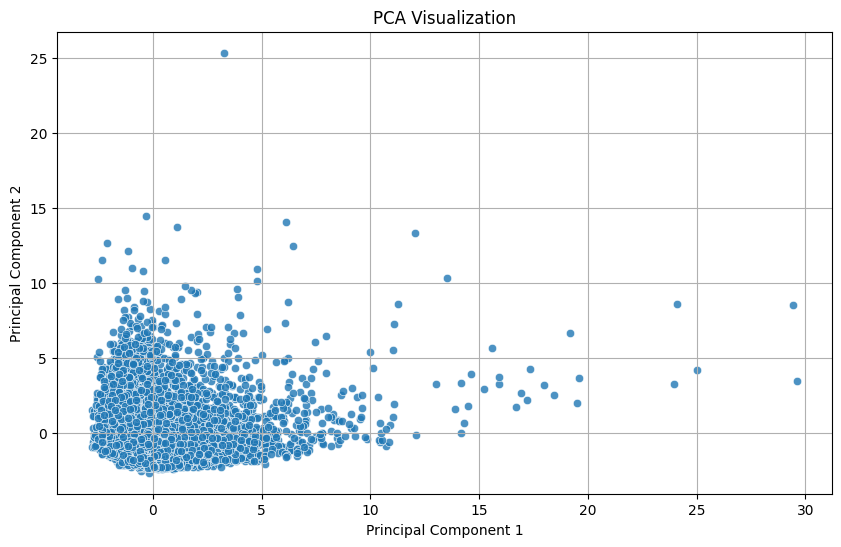

In [144]:
# Perform PCA with 2 principal components with the aim of visualizing clustering

pca2 = PCA(n_components=2)
credit_pca2 = pca2.fit_transform(credit_scaled)

# Create a DataFrame for the PCA results

credit_pca_df = pd.DataFrame(data=credit_pca2, columns=['PC1', 'PC2'])

# Plot the results

plt.figure(figsize=(10, 6))
sns.scatterplot(data=credit_pca_df, x='PC1', y='PC2', alpha=0.8)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

#Find the 2 columns which give the most covariances

In [145]:
# Create transposed credit_scaled

covariance_matrix = np.cov(credit_scaled.T)

# Get column names

column_names = credit_cleaned.columns

# Initialize variables to store the maximum covariance and corresponding column indices

max_cov = -np.inf
max_i, max_j = -1, -1 # Setting to -1 because we haven't found a value yet

# Iterate through the upper triangle of the covariance matrix (excluding the diagonal)

for i in range(covariance_matrix.shape[0]): # number of rows shape[0]
  for j in range(i + 1, covariance_matrix.shape[1]): # number of columns shape[1] in covariance matrix
    if covariance_matrix[i, j] > max_cov:
      max_cov = covariance_matrix[i, j]
      max_i, max_j = i, j

# Print the result

print(f"The two columns with the highest covariance are: {column_names[max_i]} and {column_names[max_j]}")
print(f"The highest covariance is: {max_cov:.4f}")

The two columns with the highest covariance are: PURCHASES and ONEOFF_PURCHASES
The highest covariance is: 0.9169


# Interpret the results of PCA by looking at the covariance matrix (use get_covariance() method of PCA).

Covariance matrix from PCA:


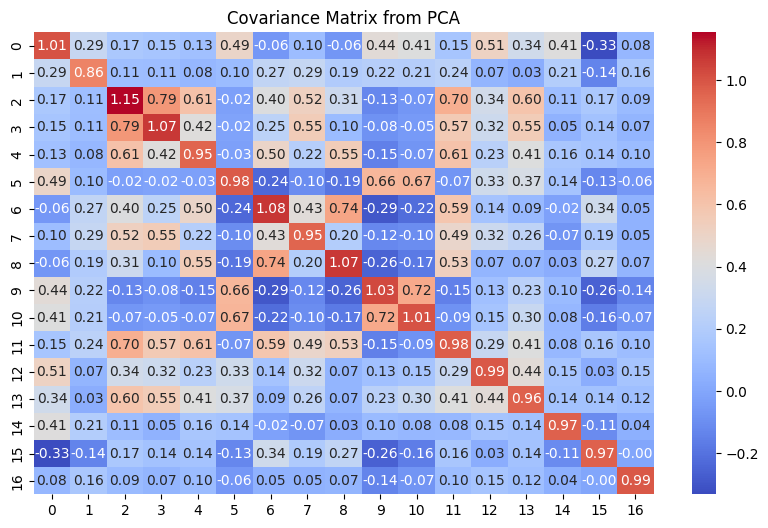

In [146]:
pca = PCA(n_components=8)
pca.fit(credit_scaled)
pca_covariance_matrix = pca.get_covariance()

print("Covariance matrix from PCA:")
#print(pca_covariance_matrix)

# Plot the covariance

plt.figure(figsize=(10, 6))
sns.heatmap(pca_covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix from PCA')
plt.show()

#Perform K Means Clustering on the 2 component PCA transformed data with clusters
ranging from 2 to 11 and plot the K Means inertia against the number of clusters (Elbow
Method). From the elbow plot, identify the ideal required number of clusters.


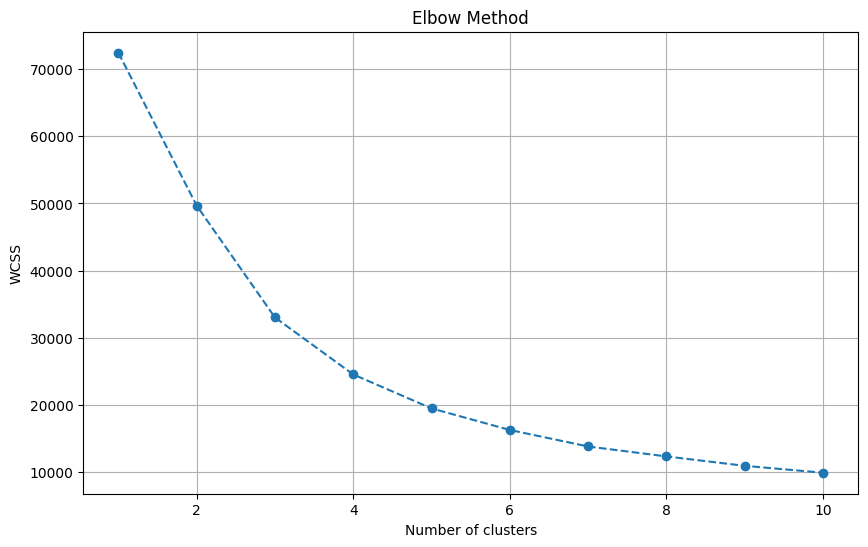

In [147]:
# Elbow method to find the optimal K

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(credit_pca2)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

#Perform K Means Clustering on the 2 component PCA transformed data with the ideal number of clusters found in the sixth bullet point.

In [148]:
# The elbow starts from 4 therefore we choose the number of clusters to be 4

n_cluster = 4

kmeans = KMeans(n_clusters=n_cluster, init='k-means++', random_state=42)
kmeans.fit(credit_pca_df)

# Get labels assigned to each data point

labels = kmeans.labels_

# Add this to the dataframe

credit_pca_df['Cluster'] = labels

#Visualize the clusters on a scatter plot between 1st PCA and 2nd PCA component giving different colors to each cluster.

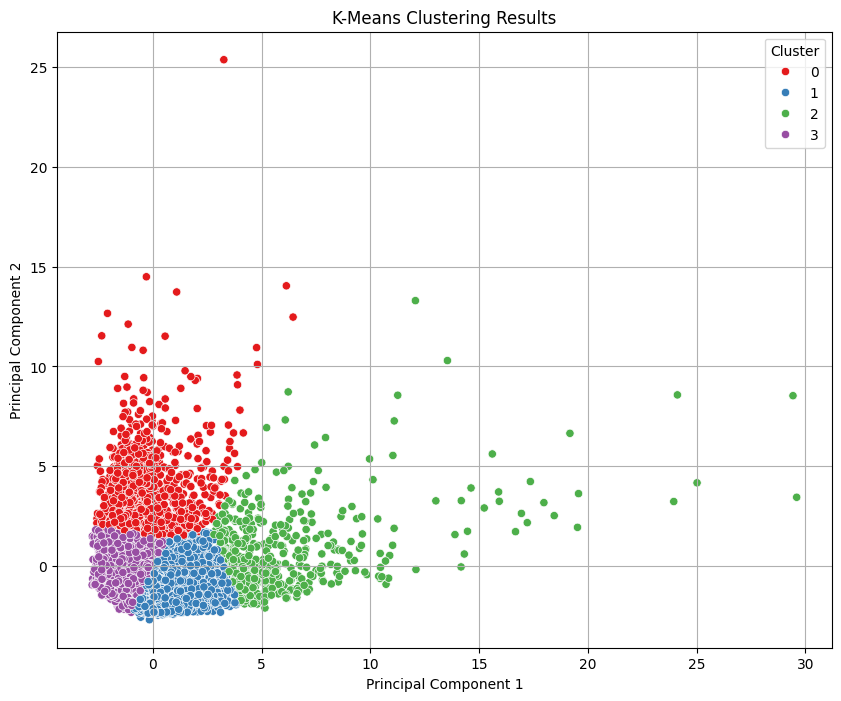

In [149]:
# Visualize the clusters in the 2D PCA space

plt.figure(figsize=(10, 8))
sns.scatterplot(data=credit_pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Interpretation

The KMeans Algorithm created 4 segments derived for Elbow method for 2 Principal Components selected by cumulative explained variance.

# Interpretation of Clusters

- Cluster Red: Widely spread through Principal Component 1 and 2 indicating a diverse group. The presence of outlier in Principal Component 2 can be seen

- Cluster Blue: This is concentrated more towards the lower value of Principal Component 2 and 1.

- Cluster Green: Widely spread on the Principal Component 1 capturing the positive maximum variance

- Cluster Purple: Located in the negative end depicts it contributes negatively to the variance.

# Other Interpretation

- The high positive covariance (0.9169) between 'PURCHASES' and 'ONEOFF_PURCHASES' indicates that these two features tend to move together

